In [1]:
import numpy as np

X = np.load('data.npy')
y = np.load('target.npy')

# loading the saved numpy arrays from the previous code

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
model = Sequential()

model.add(Conv2D(200,(3,3), input_shape=(X.shape[1:]), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       2000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0         
_________________________________________________________________
dropout (Dropout)            (None, 52900)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                2

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [5]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
#checkpoints = ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history = model.fit(X_train, y_train, epochs=20, callbacks=checkpoints, validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 61s 2s/step - loss: 0.8036 - accuracy: 0.4927 - val_loss: 0.7153 - val_accuracy: 0.4758
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
31/31 [==============================] - 55s 2s/step - loss: 0.6856 - accuracy: 0.5440 - val_loss: 0.6628 - val_accuracy: 0.6048
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
31/31 [==============================] - 57s 2s/step - loss: 0.5676 - accuracy: 0.7180 - val_loss: 0.4294 - val_accuracy: 0.8024
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
31/31 [==============================] - 59s 2s/step - loss: 0.4443 - accuracy: 0.7904 - val_loss: 0.3315 - val_accuracy: 0.9032
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
31/31 [==============================] - 56s 2s/step - loss: 0.2672 - accuracy: 0.9013 - val_loss: 0.2565 - val_accuracy: 0.9113
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch 6/20

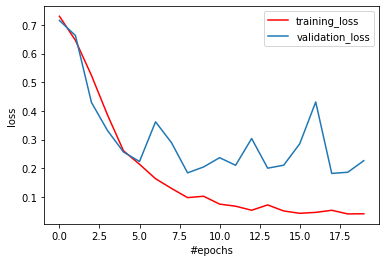

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r', label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

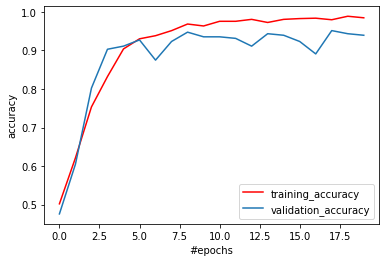

In [7]:
plt.plot(history.history['accuracy'], 'r', label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('#epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [8]:
print(model.evaluate(X_test, y_test))

5/5 [==============================] - 2s 368ms/step - loss: 0.0890 - accuracy: 0.9638
[0.08896930515766144, 0.9637681245803833]
